In [1]:
from glob import glob
import cv2
from tqdm import tqdm
import torch
from torchvision import transforms

from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

from torch import nn

In [2]:
path = "/kaggle/input/anime-sketch-colorization-pair/data"

images = glob(path + "/*/*.png")

In [3]:
print(len(images))

17769


In [4]:
images[:5]

['/kaggle/input/anime-sketch-colorization-pair/data/val/1924008.png',
 '/kaggle/input/anime-sketch-colorization-pair/data/val/1242011.png',
 '/kaggle/input/anime-sketch-colorization-pair/data/val/2644052.png',
 '/kaggle/input/anime-sketch-colorization-pair/data/val/2815006.png',
 '/kaggle/input/anime-sketch-colorization-pair/data/val/2027130.png']

In [5]:
class AnimeDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
    
    def __len__(self):
        return(len(self.path))
    
    def __getitem__(self, idx):
        img = self.path[idx]
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = self.transform(img)
        
        # split the img to target and input
        target = img[:, :, 512:]
        img = img[:, :, :512]
        
        return img, target

In [6]:
dataset = AnimeDataset(images, transform=transforms.ToTensor())

In [7]:
len(dataset)

17769

In [8]:
print(dataset[1][0])

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


In [9]:
# A helper function for better readability
def display_tensor_img(tensor_img):
    plt.imshow(tensor_img.permute(1,2,0))

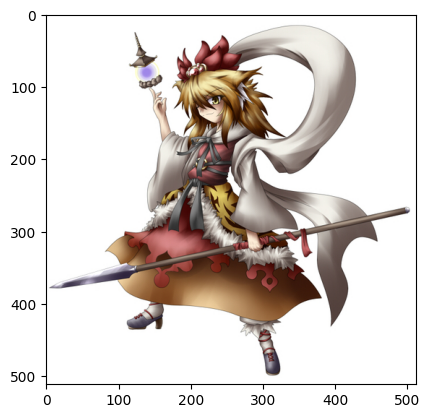

In [13]:
display_tensor_img(dataset[1][0])

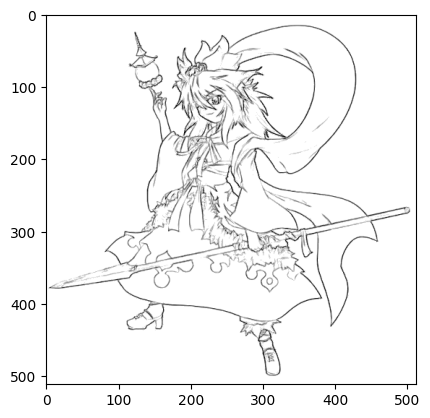

In [12]:
display_tensor_img(dataset[1][1])